The Cleveland heart disease dataset was created by John Gennari based on Dr. Detrano's database and was modified to be a real MIXED dataset:
http://archive.ics.uci.edu/ml/datasets/Heart+Disease
The original database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. Attributes: 8 symbolic, 6 numeric.
For pre-processing, we use the original attributes to replace the symbolic attributes: age; sex (1,0); cp (1-4); trestbps; chol; fbs (1,0); restecg (0,1,2); thalach; xang (1,0); oldpeak; slope (1,2,3); ca; thal (3,6,7); class att: 0 is healthy, 1,2,3,4 is sick. The missing values that were represented by "？“ are deleted from the dataset.
All process above was done on Microsoft Excel, then the original .txt file was saved as .csv file for ease of future analysis in Python.
The processed dataset was uploaded as cleveland-preprocessed.csv

# Graphing & Analyzing

First, import all essential packages for graphing as initiallization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('cleveland-processed.csv')
df.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,type
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


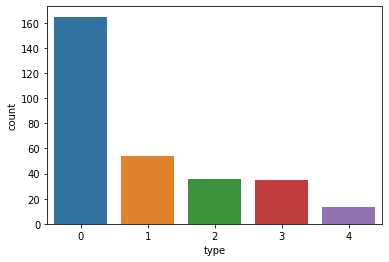

In [4]:
sns.countplot(x='type',data=df)
plt.show()

For the 5-class classification, the "type" data predicting (diagnoses results). "0" means healthy with no heart disease, 1 to 4 are 4 different types of heart diseases.
Next, we need to plot the histograms with attributes with regard to the "type" column.

Text(0, 0.5, 'sex: 0=female; 1=male')

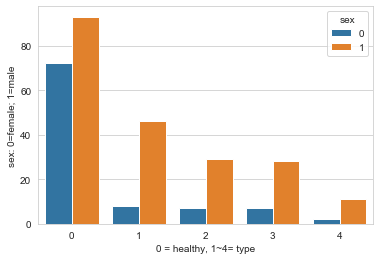

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='type',hue='sex',data=df)
plt.xlabel("0 = healthy, 1~4= type")
plt.ylabel("sex: 0=female; 1=male")

Male is the majority in this dataset. But this aspect considered, male is still more prone to heart disease as we seen here: in healthy group we have comparable amount of both sex yet in all sick groups there are multiple times males more than female. Next attribute that can be highly relatable to the heart disease is the chest pain type:

Text(0.5, 0, 'chest pain type')

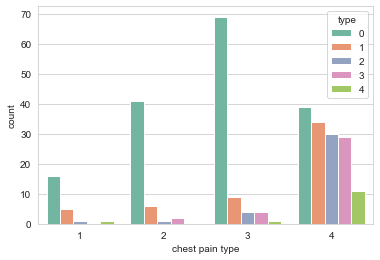

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='type',data=df,palette='Set2')
plt.xlabel("chest pain type")

From all the patients with type 1/2/3 chest pain, the amount with actual heart disease is quite minor. Yet in all the type 4 chest pain patients. Only less than half of them are healthy. So we can assume that only type 4 chest pain strongly indicates heart disease while the other 3 types don’t.

Text(0.5, 0, 'the slope of the peak exercise ST segment')

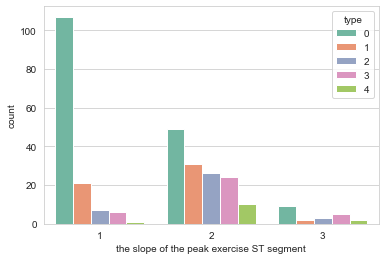

In [7]:
sns.countplot(x='slope',hue='type',data=df,palette='Set2')
plt.xlabel("the slope of the peak exercise ST segment")

Text(0.5, 0, 'resting electrocardiographic results')

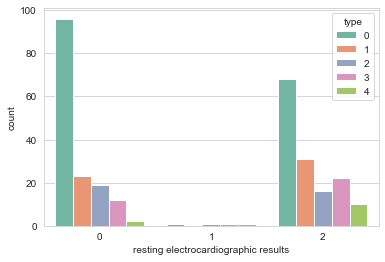

In [8]:
sns.countplot(x='restecg',hue='type',data=df,palette='Set2')
plt.xlabel("resting electrocardiographic results")

Text(0.5, 0, 'fasting bloood sugar')

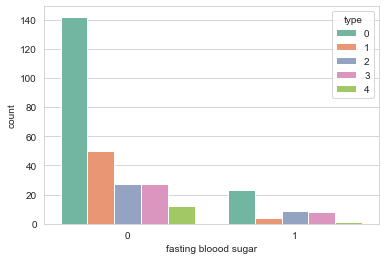

In [9]:
sns.countplot(x='fbs',hue='type',data=df,palette='Set2')
plt.xlabel("fasting bloood sugar")

Text(0.5, 0, 'exercise induced angina')

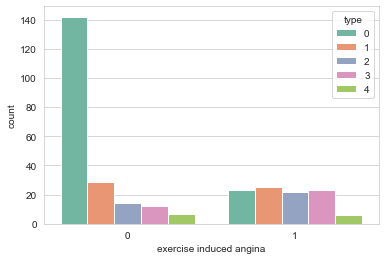

In [10]:
sns.countplot(x='exang',hue='type',data=df,palette='Set2')
plt.xlabel("exercise induced angina")

Text(0.5, 0, 'number of major vessels')

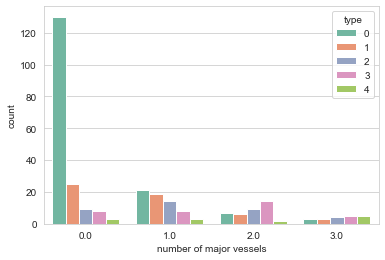

In [11]:
sns.countplot(x='ca',hue='type',data=df,palette='Set2')
plt.xlabel("number of major vessels")

From these attubutes, we can clearly see some of the attributes are more related to the heat disease type data than the others. For example, the number of major vessels (ca) obviously plays a major role in determining the final heart disease type. Similarly, according to the slope of the peak exercise ST segment, flat curve implies the presence of heart disease more than increasing and decreasing curve.

# Scale data & Correlation matrix

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.drop(['type'], axis= 1)
y= pd.DataFrame(df['type'])

#Scale Data
scaler = StandardScaler()
X=StandardScaler().fit_transform(X.values)
X = pd.DataFrame(X)
X.columns=(df.drop(['type'], axis= 1)).columns

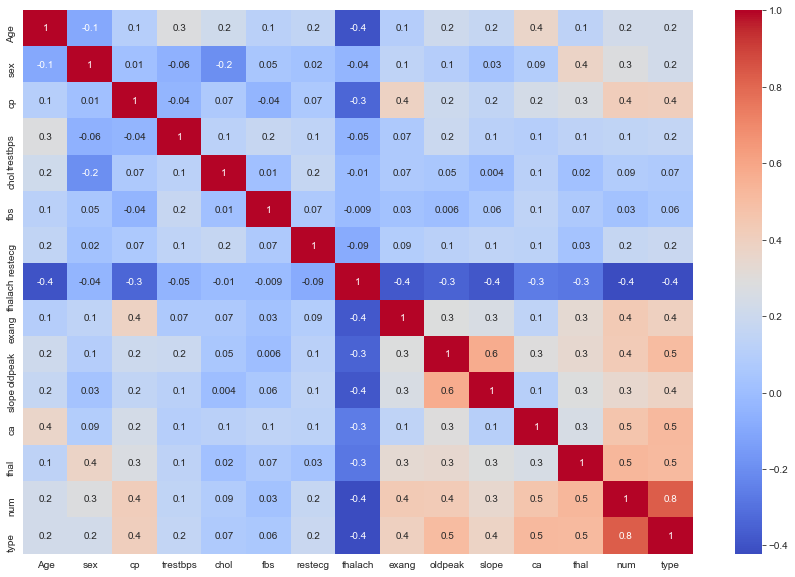

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

# Split Data for Training & Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 50)
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

#data was then splited into training and testing groups, traning group takes up 80% of the data (240 people) and testing 20% (60 people). This is a general rule of thumb for splitting data to train ML algorithms with.

# Machine Learning Model: Random Forest

In [23]:
#import RFC from sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
#test the model with default parameters

print(classification_report(y_test,pred_rfc))

print(confusion_matrix(y_test,pred_rfc))

print('Accuracy score:', accuracy_score(y_test,pred_rfc))

# Fine tuning the parameters

A publication by Randal S. Olson, et al. in 2017 provides practical advice for solving bioinformatic problems with machine learning, “Data-driven Advice for Applying Machine Learning to Bioinformatics Problems”.
https://arxiv.org/abs/1708.05070

HP1, criterion: string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

Details:
"entropy" Recommendation by Olson

Values chosen:
'criterion': ['entropy','gini'],

HP2, max_features: int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features. 
(Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.)
Values chosen 'max_features': [0.25],

HP3, n_estimators: integer, optional (default=100)
The number of trees in the forest.
Recommendation by Olson is "500"

Values chosen
'n_estimators': [500,1000],

In [ ]:
# Make Directory
path=folder_path(OUTPUT_path+'/RFC')
path_refine=folder_path(OUTPUT_path+'/RFC_Refine')

In [ ]:
#set path to directory
RFC_refine_model_dir=os.path.join(path_refine,'model.pkl')
RFC_model_dir=os.path.join(path,'RFC_model.pkl')

In [ ]:
#search for a split
if os.path.exists(RFC_model_dir) == False:

    RFC_parameters = {'criterion': ['entropy'], 'max_features': [0.25], 'n_estimators': [500]}   
    rfc_refine = RandomForestClassifier(oob_score = True) 
    rfc_refine=GridSearchCV(RFC_refine, rfc_parameters,cv=10)
    rfc_refine.fit(X_train,y_train.values.ravel())
    rfc_refine.best_estimator_
    joblib.dump(rfc_refine.best_estimator_,RFC_model_dir)
    
    rfc = RandomForestClassifier(oob_score = True)    
    parameters = {'criterion': ['entropy','gini'], max_features': [0.25],'n_estimators': [500,1000]}
    cv = GridSearchCV(rf, parameters, cv=10)
    cv.fit(X_train, y_train.values.ravel())
    print_results(rfc_parameters,cv,'Random Forest (RF)',os.path.join(path,'RF_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,RFC_model_dir)
else:
    print('RFC already existed')